In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else [])
df["job_skills"] = df["job_skills"].apply(lambda skills: [skill.title() for skill in skills] if len(skills) > 0 else skills)


In [3]:
df_da_us = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

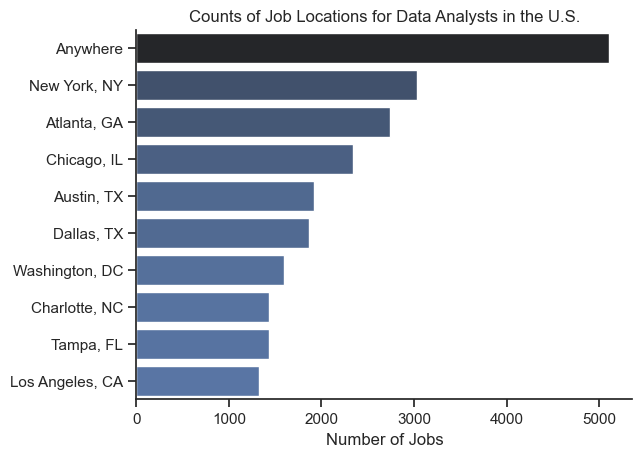

In [11]:
df_plot = df_da_us["job_location"].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="job_location", hue="count", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Counts of Job Locations for Data Analysts in the U.S.")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

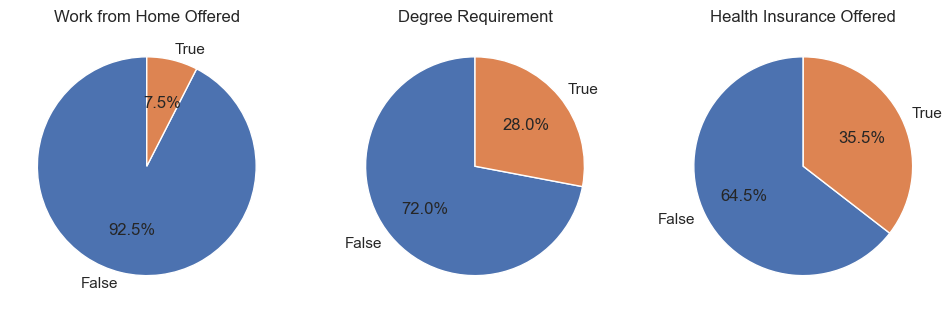

In [12]:
dict_column = {
  "job_work_from_home": "Work from Home Offered",
  "job_no_degree_mention": "Degree Requirement",
  "job_health_insurance": "Health Insurance Offered"
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
  ax[i].pie(df_da_us[column].value_counts(), labels=["False", "True"], autopct="%1.1f%%", startangle=90)
  ax[i].set_title(title)

plt.show()

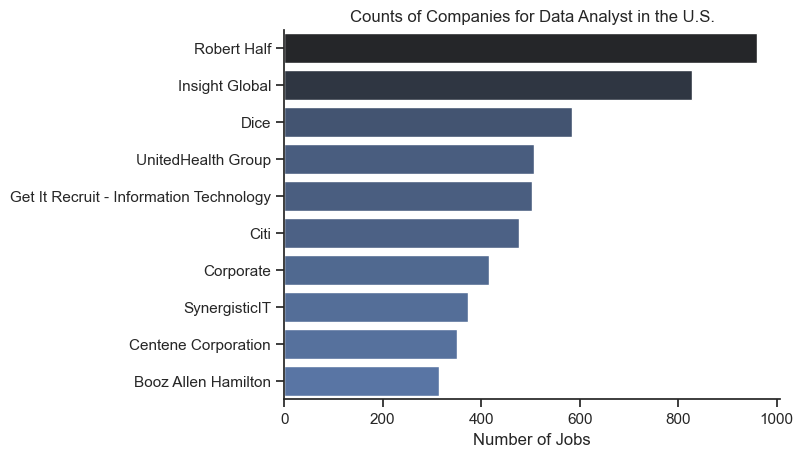

In [18]:
df_plot = df_da_us["company_name"].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="company_name", hue="count", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Counts of Companies for Data Analyst in the U.S.")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()